## Name : Sai Sri Mohan Datta Bayya

## Task 1 : Prediction using ML

## The Spark Foundation GRIP FEB22

### Predict the percentage of students based on the no. of study hours.

#### In this task we will predict the percentage of marks that a student is expected to score based upon the no. of hours that they studied. This is sample linear regression task as it involves two variables.

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  

In [44]:
dataset = pd.DataFrame({
    "Hours" : [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
    "Scores" : [21,47,27,75,30,20,88,60,91,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
           })

In [45]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [47]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.880000
std,2.525094,25.846212
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualisation

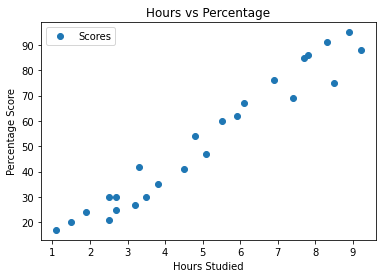

In [48]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the data

In [49]:
X = dataset[["Hours"]]
y = dataset["Scores"]
reg = LinearRegression().fit(X, y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the data

In [51]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


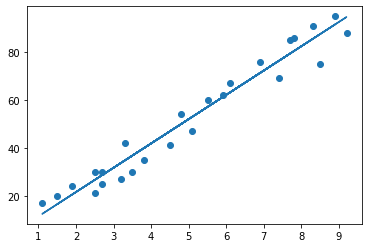

In [52]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Testing the data

In [53]:
print(X_test) 
y_pred = regressor.predict(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.457983
2,27,33.727081
19,69,76.391914
16,30,26.616276
11,62,61.154474


In [55]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 95.18475657128059


## Model Evaluation

In [56]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.378052570244726
